In [4]:
import sklearn
import mglearn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

# Introduction to Machine Learning
### Andreas Mueller and Sarah Guido (2017) O'Reilly
## Ch. 2 Supervised Learning

# Neural Networks (Deep Learning)

## MLP feedforward neural network
* Generalization of linear models for classification and regression
* Prediction by a linear regressor is given as:
`y_hat = w[0]*x[0] + w[1]*x[1] + ... w[p]*x[p]`

### Visualization of logistic regression
* Input features and predictions are shown as nodes 
* Coefficients are connections between the nodes

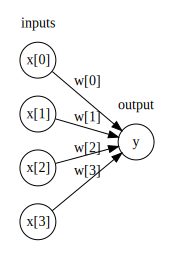

In [6]:
display(mglearn.plots.plot_logistic_regression_graph())

## MLP feedforward neural network
* Process of computing weighted sumsis repeated multiple times
* Computing hidden units, which are combined to yield final result

### Non-linear function
* After computing a weighted sum for each hidden unit, a non-linear function is applied to the results
* Usually the rectifying nonlinearyity (i.e., rectified linear unit, or `relu`) or the 'tangens hyperbolicus (`tanh`)
* Result of this function is then used in weighted sum that computes the output, or target `y_hat`

#### Either non-linear functoin allows neural network to learn more complicated functions that a linear model could

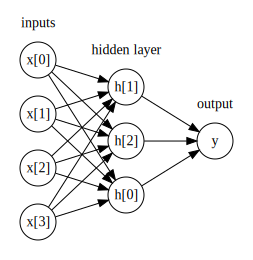

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

### Parameter: # Nodes in hidden layer
* Number of nodes in the hidden layer needs to be set by the user
* As small as 10 for simple dataset, or high as 10,000 for cmoplex dataset
* Can also add additional hidden layers

### Plot: MLP with two hidden layers
* Having large neural network with many layers of computation and hidden units inspired the term 'deep learning'

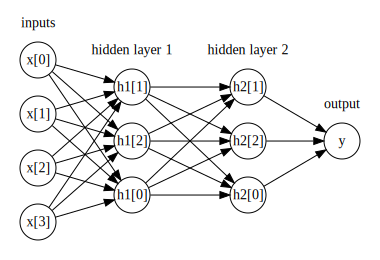

In [8]:
display(mglearn.plots.plot_two_hidden_layer_graph())

## Tuning Neural Networks
* By default, MLP uses 100 hidden nodes (a lot for small dataset)
* With only 10 hidden units, the decision boundary looks more ragged

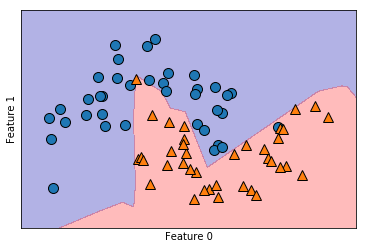

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                    hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## MLP with two layers for smoother boundary
* Can add more hidden units, add a second layer
* or use `tanh` nonlinearity

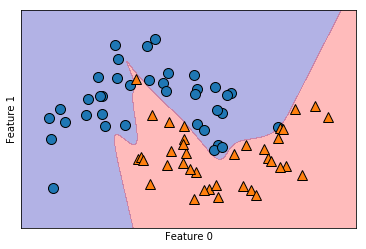

In [15]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', 
                    random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## L2 Penalty and Neural Network
* Control complexity of NN using L2 penalty to shrink weights toward zero, as with Ridge regression and linear classifiers
* `alpha` parameter in `MLPClassifier`, is set to low value by default (little regularization) 
* Plots shows effects of different alpha values with two hidden layers of 10 or 100 units:

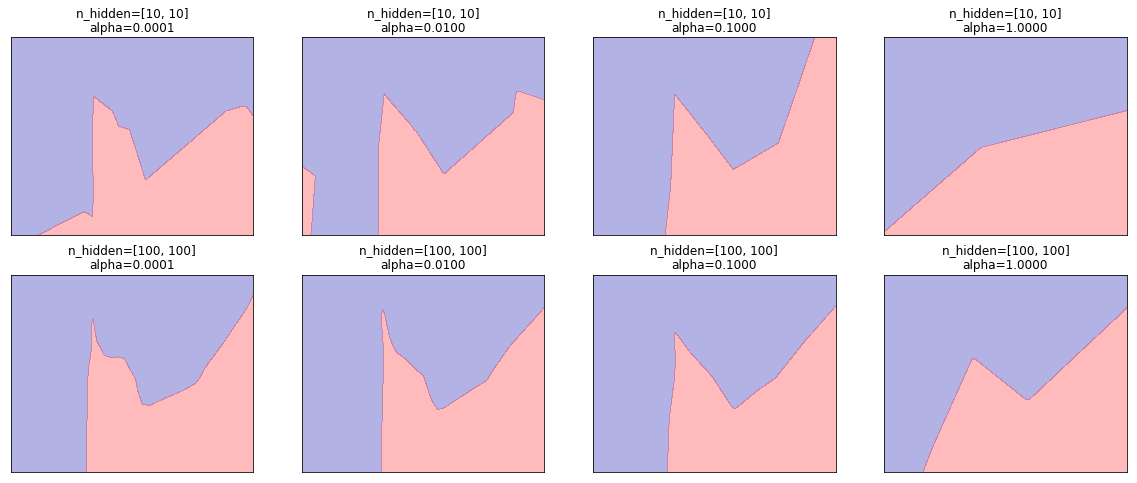

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, 
                                                              n_hidden_nodes, alpha))

### Neural Network Weights
* Weights are set randomly before learning is started, random initialization affects the model that is learned
* Even using same parameters, can get very differen models using different SEEDS

## Apply MLPClassifier to Breast Cancer Dataset
* Start with default parameters

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per-feature maxima\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accurary on Training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy Test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accurary on Training set: 0.90
Accuracy Test set: 0.90


## Rescale the data
* Accuracy of MLP is good, but as with SVC model, scaling of data is problem
* Normalize the data (mean=0, stdev=1) for both training and test sets 
* Rerun the MLP analysis on rescaled data

In [31]:
# Compute mean value per feature on Training set
mean_on_train = X_train.mean(axis=0)

# Compute standard deviation of each feature on Training set
std_on_train = X_train.std(axis=0)

# Subtract the mean, and scale by inverse standard deviation
X_train_scaled = (X_train - mean_on_train) / std_on_train

# Do the same for the test set, using min and range of training set
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [34]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accurary on Training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy Test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accurary on Training set: 0.998
Accuracy Test set: 0.951


/Users/seanshiverick/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


### Warning from model
* Results are better after scaling, but warning tells us maximum iterations is reached
* `adam` algorithm tells us we should increase the number of iterations
* Increasing iterations only affect training set performance

## Tuning Parameters: alpha
* Decrease model complexity to get better generalization performance
* Increase `alpha` parameter quite aggressively (from 0.001 to 1.0)
* Adds stronger regularization to the coefficient weights

In [35]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accurary on Training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy Test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accurary on Training set: 0.991
Accuracy Test set: 0.965


## Analysis of Model
* Analyzing neural network is tricker than analyzing linear model or tree-based model
* Look at the weights (coefficients) in the model

### Heatmap Plot
* Shows weights learned connecting the input to the first hidden layer
* Rows in the plot correspond to the 30 input features
* Columns in plot correspond to the 100 hidden units

Light colors show large positive values, dark colors represent negative numbers

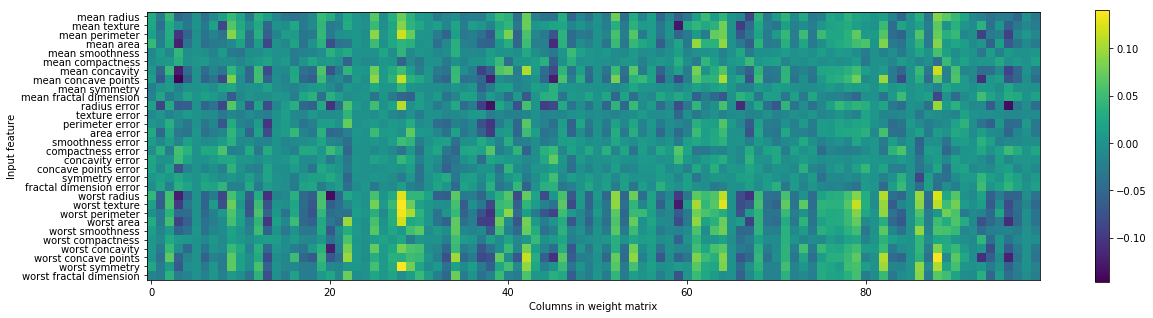

In [36]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Interpretation of Figure
* Feature that have very small weights for all hidden units are 'less important' to model
* Could also visualize weight connecting the hidden layers to the output layer, but that is even harder to interpret
* MLP Classifier and MLPRegressor only capture small subset of what is possible with neural networks